# My notebook

In [289]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as mplt
import seaborn as sea



In [290]:
df = pd.read_csv('athlete_events.csv')

In [291]:
print(df.head(6))

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                  

In [292]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Team'] = le.fit_transform(df['Team'])
df['NOC'] = le.fit_transform(df['NOC'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Event'] = le.fit_transform(df['Event'])
df['Season'] = le.fit_transform(df['Season'])

df["Medal"].fillna("NA", inplace=True)
df["Medal"] = df["Medal"].astype("category")
df['Medal'].replace("NA", "None", inplace=True)
df['Medal'] = df['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0})

In [293]:
print(df.head(6))

   ID                      Name  Sex   Age  Height  Weight  Team  NOC  \
0   1                 A Dijiang    1  24.0   180.0    80.0   198   41   
1   2                  A Lamusi    1  23.0   170.0    60.0   198   41   
2   3       Gunnar Nielsen Aaby    1  24.0     NaN     NaN   273   55   
3   4      Edgar Lindenau Aabye    1  34.0     NaN     NaN   278   55   
4   5  Christine Jacoba Aaftink    0  21.0   185.0    82.0   704  145   
5   5  Christine Jacoba Aaftink    0  21.0   185.0    82.0   704  145   

         Games  Year  Season       City  Sport  Event Medal  
0  1992 Summer  1992       0  Barcelona      8    159     0  
1  2012 Summer  2012       0     London     32    397     0  
2  1920 Summer  1920       0  Antwerpen     24    348     0  
3  1900 Summer  1900       0      Paris     61    709     3  
4  1988 Winter  1988       1    Calgary     53    622     0  
5  1988 Winter  1988       1    Calgary     53    618     0  


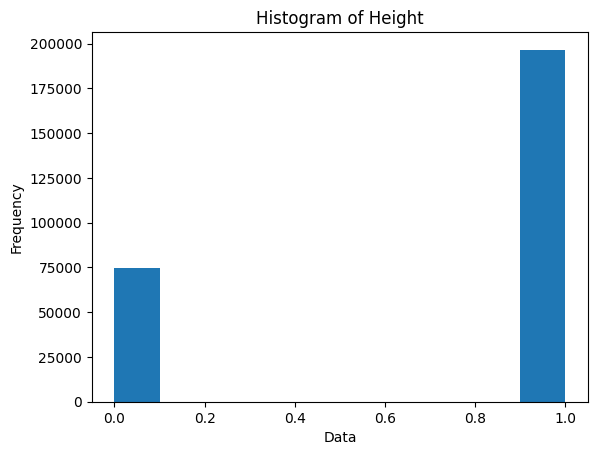

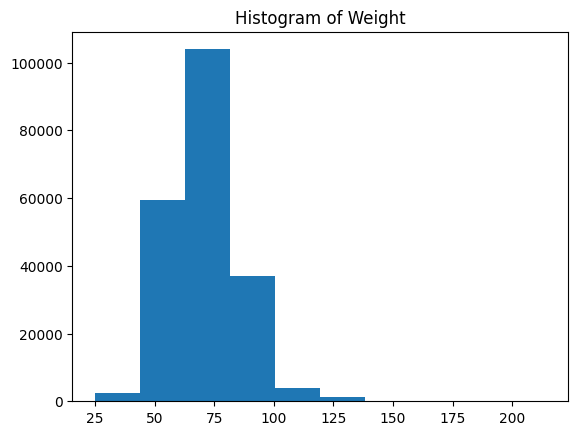

In [294]:
mplt.hist(df['Sex'], bins=10)
mplt.xlabel('Data')
mplt.ylabel('Frequency')
mplt.title('Histogram of Height')
mplt.show()

mplt.hist(df['Weight'], bins=10)
mplt.title('Histogram of Weight')
mplt.show()

In [295]:
# sea.distplot(df['Height'], hist=False, kde=True, rug=True)
# mplt.xlabel('Data')
# mplt.ylabel('Density')
# mplt.title('Density Plot of Data')
# mplt.show()


In [296]:
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df = df.drop(['Name', 'Games', 'City'], axis=1)
df.dropna(inplace=True)


In [297]:
print(df.head(6))

   ID  Sex   Age     Height  Weight  Team  NOC  Year  Season  Sport  Event  \
0   1    1  24.0  180.00000    80.0   198   41  1992       0      8    159   
1   2    1  23.0  170.00000    60.0   198   41  2012       0     32    397   
2   3    1  24.0  175.33897    70.0   273   55  1920       0     24    348   
3   4    1  34.0  175.33897    70.0   278   55  1900       0     61    709   
4   5    0  21.0  185.00000    82.0   704  145  1988       1     53    622   
5   5    0  21.0  185.00000    82.0   704  145  1988       1     53    618   

  Medal  
0     0  
1     0  
2     0  
3     3  
4     0  
5     0  


In [298]:
#training and testing data
X = df.drop(['Medal'], axis=1)
y = df['Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [299]:
print(y)

0         0
1         0
2         0
3         3
4         0
         ..
271111    0
271112    0
271113    0
271114    0
271115    0
Name: Medal, Length: 261642, dtype: category
Categories (4, int64): [1, 3, 0, 2]


In [300]:
# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Predict the values for the testing data
y_pred = reg.predict(X_test)

# Convert the predicted values to the nearest integer
y_pred = y_pred.round().astype(int)

In [301]:
# Train the decision tree model
clf = DecisionTreeClassifier().fit(X_train, y_train)

# Predict the values for the testing data
y_pred_tree = clf.predict(X_test)

In [302]:
linear_reg_acc = accuracy_score(y_test, y_pred)

# Calculate the accuracy for the decision tree model
decision_tree_acc = accuracy_score(y_test, y_pred_tree)

# Compare the accuracy of the two models
if linear_reg_acc > decision_tree_acc:
    print("Linear Regression model is more accurate")
    print(linear_reg_acc)
else:
    print("Decision Tree model is more accurate")
    print(decision_tree_acc)

Decision Tree model is more accurate
0.8338779644174359
